In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
df=pd.read_csv('talent_data.csv')

In [16]:
X=df.drop(columns='company')
Y=df['company']

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [27]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((19, 2), (5, 2), (19,), (5,))

In [28]:
model=DecisionTreeClassifier()

In [29]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
pred=model.predict(X_test)

In [31]:
Y_test

13    Nexsales
18     Swabhav
3       HiTech
14    Nexsales
20    CyberInc
Name: company, dtype: object

In [32]:
accuracy_score(Y_test,pred)

1.0

In [33]:
pd.DataFrame({'predicted':pred,'actual':Y_test})

,predicted,actual
13,Nexsales,Nexsales
18,Swabhav,Swabhav
3,HiTech,HiTech
14,Nexsales,Nexsales
20,CyberInc,CyberInc


In [34]:
# persist the model, save the model 
# client application has to consume it

In [36]:
# serialize the model
pd.to_pickle(model,'talent_model.bin')

In [37]:
from sklearn import tree 

In [47]:
tree.export_graphviz(model,out_file='talent_model.dot',feature_names=['cgpa','cc'],class_names=sorted(Y.unique()),filled=True,label='all',rounded=True)

In [48]:
#load dot , graphic description language

In [49]:
# external library
import graphviz

In [50]:
with open('talent_model.dot') as f:
    dot_graph=f.read()

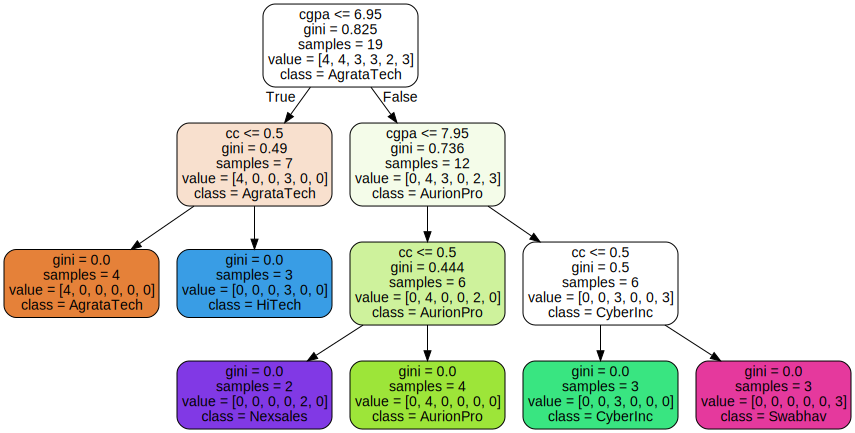

In [51]:
display(graphviz.Source(dot_graph))